|name|ANR|email|
|----|---|-----|
|Joep Hermus|568638|j.hermus@tilburguniversity.edu|
|Freek Heuvelmans|702516|f.j.heuvelmans@tilburguniversity.edu|

# Introduction

From an economic point of view, there are many reasons why it is interesting to know why agglomerations exist. From transport costs and concentration of supply and demand of goods and services, to soaring real estate prices in central cities. Last but not least, a good amount of studies has found that the concentration of economic activity results in higher productivity and more economic growth [(Ciccone & Hall, 1996; Henderson, 1986; Nakamura, 1985; Moomaw, 1981; Sveikauskas, 1975)](#abcd). [Pflüger (2004)](http://www.diw.de/documents/publikationen/73/diw_01.c.40255.de/dp339.pdf) describes a basic model with which to determine the factors that cause agglomeration. Using this model and python we will try to make it easy to answer the question: What are the factors influencing the extent of economic agglomeration?

# Method

In the model, agglomeration arises because entrepreneurs choose to settle in one of two locations, both of which have a hinterland consisting of an immobile population (i.e. these people cannot move to the other location). 

The decision to settle in one of the two locations is characterised by the following equation:

$V-V^{*}=\frac{\xi}{\sigma-1}*ln\left(\frac{h+\varphi(1-h)}{1-h+\varphi h}\right) + \frac{\xi (1-\varphi)}{\sigma}\left [ \frac{\rho+h}{h+\varphi(1-h)}-\frac{\rho^{*}+1-h}{1-h+\varphi h} \right ]$

With the following variables

|Symbol|Definition|
|----|---|
|$V-V^{*}$|difference in utility of establishing a business between home and foreign location|
|$h$|share of total skilled labor supply that works in home region|
|$\tau$|transport costs|
|$\sigma$|elasticity of substitution between manufacturing varieties|
|$\varphi$ $=\tau^{1-\sigma}$|freeness of trade|
|$\rho$, $\rho^{*}$ |the number of immobile workers per entrepreneur for both locations|
|$\xi$|preference for manufactured goods|


For the process by which the final equation arises and the variables enter into it we refer to [the paper by Pflüger](http://www.diw.de/documents/publikationen/73/diw_01.c.40255.de/dp339.pdf).

This model provides a basic understanding of the factors influencing to what extent agglomeration arises in the discussed setting. However, even the basic model is not easily analised because of the complexity of the equation with which Pflüger concludes. To make this model accessible, we use python to present the main equation in a graph, which is also used by Pflüger to illustrate his model, and add the possibility of adjusting all variables at will using sliders. 

Here $V-V^{*}$ is the difference between the value of establishing a business in one location versus in the other. This is what all the sources of agglomeration boil down to: if the value of establishing a business in location A ($V$) is bigger than that of establishing one in location B ($V^{*}$), there will be businesses moving from location B to location A untill $V-V^{*}=0$, **or** untill all businesses are located at one of the locations. The horizontal axis in the graph below indicates the extent of agglomeration, indicated by the percentage of businesses located in location A: $h$. Note that agglomeration can also take place in B, in this case the percentage of businesses located in A will be below 0.5. Since there is no outside location, the businesses  not located in A will be located in B. Below you can find the interactive graph, our main tool with which we answer our research question. In the next section we discuss the main findings which can be derived by adjusting the sliders, and provide some economic intuition based on the complete model. 

<IPython.core.display.Javascript object>


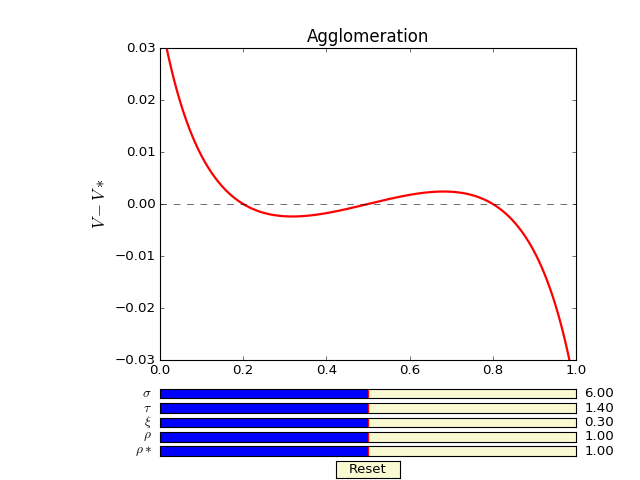

In [1]:
#Import stuff
from numpy import log
from scipy import arange
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.widgets import Slider, Button, RadioButtons

#Parameters first graph

def valuefunction1(tao1, sigma1, xi1, rho1, rhof1):
    return (xi1/(sigma1-1))*log((h+(tao1**(1-sigma1))*(1-h))/(1-h+(tao1**(1-sigma1))*h))+(xi1*(1-(tao1**(1-sigma1)))/sigma1)*(((rho1+h)/(h+(tao1**(1-sigma1))*(1-h)))-((rhof1+1-h)/(1-h+(tao1**(1-sigma1))*h)))

axis_color = 'lightgoldenrodyellow'
fig = plt.figure()
plt.title("Agglomeration",fontsize = 15)
plt.ylabel("$V-V*$",fontsize = 15)

# Draw the plot
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)
h = arange(0.0, 1.0, 0.001)
tao1_0 = 1.4
sigma1_0 = 6
xi_0=0.3
rho_0 = 1
rhof_0 = 1
[line] = ax.plot(h, valuefunction1(tao1_0, sigma1_0, xi_0, rho_0, rhof_0), linewidth=2, color='red')
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', c="black", linewidth=0.5, hold=None)
ax.set_xlim([0, 1])
ax.set_ylim([-0.03, 0.03])

# Add two sliders for tweaking the parameters
freq_slider_ax = fig.add_axes([0.25, 0.14, 0.65, 0.02], axisbg=axis_color)
freq_slider = Slider(freq_slider_ax, r'$\tau$', 1.1, 1.7, valinit=tao1_0)
sigma_slider_ax = fig.add_axes([0.25, 0.17, 0.65, 0.02], axisbg=axis_color)
sigma_slider = Slider(sigma_slider_ax, r'$\sigma$', 4, 8, valinit=sigma1_0)
xi_slider_ax = fig.add_axes([0.25, 0.11, 0.65, 0.02], axisbg=axis_color)
xi_slider = Slider(xi_slider_ax, r'$\xi$', 0.1, 0.5, valinit=xi_0)
rho_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.02], axisbg=axis_color)
rho_slider = Slider(rho_slider_ax, r'$\rho$', 0.5, 1.5, valinit=rho_0)
rhof_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.02], axisbg=axis_color)
rhof_slider = Slider(rhof_slider_ax, r'$\rho*$', 0.5, 1.5, valinit=rhof_0)

def sliders_on_changed(val):
    line.set_ydata(valuefunction1(freq_slider.val, sigma_slider.val, xi_slider.val, rho_slider.val, rhof_slider.val))
    fig.canvas.draw_idle()
    
freq_slider.on_changed(sliders_on_changed)
sigma_slider.on_changed(sliders_on_changed)
xi_slider.on_changed(sliders_on_changed)
rho_slider.on_changed(sliders_on_changed)
rhof_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.525, 0.005, 0.1, 0.035])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    sigma_slider.reset()
    xi_slider.reset()
    rho_slider.reset()
    rhof_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

plt.show()

# Results

## Effect of transportation costs ($\tau$)
In this model transportation costs are a spreading force, i.e. if transportation costs go up there
will be less agglomeration. The reason for this is that it is more profitable for firms to locate
close to the immobile consumers when the transportation costs are high. Since the price of the
goods imported from the other region is dependent on the transportation costs the average
price will increase with transportation costs. It is also less relevant for the home region how
many firms are located in the abroad region since the transportation costs makes them less
competitive with the home region. A higher transportation costs reduces the earnings of
entrepreneurs. 

## Effects of a stronger taste for variety ($\sigma$)
When consumers have a stronger taste for variety this leads to agglomeration. The effect is the opposite of that of higher transportation costs. It makes it easier to export to other regions because every person is willing to pay more for goods of which he has relatively few. This increases the earnings for entrepreneurs. It also raises prices in both locations. Since consumers are willing to pay more for imported goods there is less incentive for firms to locate closer to the immobile consumers. 

## Effect of a lower ratio of immobile to mobile workers ($\rho$) in both locations
If there are fewer immobile workers per entrepreneur, entrepreneurs have more influence on the size of each market by deciding where they settle themselves, because only they can move between locations. I.e. the demand market is bigger where most firms are located. Firms would rather locate where the market is biggest because of the transport costs when exporting goods. Therefore firms will tend to move to the region where most firms are located, and this effect becomes more dominant as the number of immobile people per entrepreneur decreases.

## Effect of a change in $\rho$ in one location
If $\rho$ is decreased in only one location, this means that there are fewer immobile people in this location compared to the other region. since firms will want to charge transport costs to as few people as possible, they will settle in the location with the largest number of immobile people per entrepreneur.

## Effect of a change in preferences for manufactured goods ($\xi$)
If preferences for manufactured goods increase, the division of firms over the two regions does not change. This variable is therefore neither an agglomerating nor a spreading force. We can see that the difference in value of starting a business in a region fluctuates more as $\xi$ increases. A possible explanation for this may be, that because consumers attach more value to industrial goods compared to the subsistence goods, they spend more money on industrial goods, increasing the value of the market and the value for the entrepreneur in optimizing his location. There is no time dimension in this model, however intuitively it makes sense to assume that entrepreneurs will move to the other location more quickly because of the bigger difference in utility.

# Discussion

We chose the Pfluger model because it is simple and it is easy to see what happens if different parameters are changed. Therefore it is a good tool for policymakers deciding on policies that influence trade. The model captures the benefits of agglomeration quite well. It results in more competition and a bigger market in the agglomerated location. The model has however some limitations. Not all agglomeration costs are included in the model. In the model, agglomeration in one city means that in the other city prices will be relatively higher. In this location the workers are therefore affected negatively. The model says that this will lead to more firms moving to this city because profits are higher. The model however does not capture how these people in the negatively affected location can be compensated. Another cost of agglomeration is not included. If more people concentrate, congestion and pollution will become a problem. Furthermore housing prices will increase, this happened for example in San Francisco where house prices have increased as a consequence of companies concentrating in Sillicon Valley. This will lead to a crowding out effect of people who cannot afford this expensive housing, in our model the agricultural workers. Perhaps these workers (in the real world) would have to move to the other location. The model does not capture this. Our last criticism is the fact that workers are considered to be non-mobile. This assumption is not likely to be representative for real life and if we would let this assumption go our model would look different. Workers would likely want to move to the agglomerated location as well.


# References
<a name="abcd"></a>

[A. Ciccone and R. E. Hall (1996). Productivity and the density of economic activity, *American
Economic Review*, 86, 54 70 .](https://web.stanford.edu/~rehall/Productivity-AER-March-1996.pdf)

[J. V. Henderson (1986). Efficiency of resource usage and city size, *Journal of Urban Economics*, 19,
47 70 .](http://www.gonzalo.depeco.econo.unlp.edu.ar/EU1UTDT/henderson86.pdf)

[R. L. Moomaw (1981). Productivity and city size: A critique of the evidence, *Quarterly Journal of
Economics*, 96, 675 688 . Ž .](http://qje.oxfordjournals.org/content/96/4/675.short)

[R. Nakamura (1985). Agglomeration economies in urban manufacturing industries: A case of Japanese
cities, *Journal of Urban Economics*, 17, 108 124 .](http://www.sciencedirect.com/science/article/pii/0094119085900403)

[M. Pflüger (2004). A simple, analytically solvable, Chamberlinian agglomeration model. *Regional Science and Urban Economics*, 34(5), 565-573.](http://www.diw.de/documents/publikationen/73/diw_01.c.40255.de/dp339.pdf)

[L. Sveikauskas (1975). The productivity of cities, *Quarterly Journal of Economics*, 89, 393 413
Ž . ](http://www.jstor.org/stable/pdf/1885259.pdf)
